# **Network Intrusion Detection System (IDS)** Lab

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Task 1:** Dataset Exploration and Understanding

Loading train and test dataset

In [3]:
df_train = pd.read_csv('../datasets/cyber/UNSW_NB15_training-set.csv')
df_test = pd.read_csv('../datasets/cyber/UNSW_NB15_testing-set.csv')
pd.set_option('display.max_columns', None)

In [4]:
df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [5]:
df_test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [6]:
print("Shape of training data:", df_train.shape)
print("\nColumns:\n", df_train.columns)

Shape of training data: (175341, 45)

Columns:
 Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [7]:
print("Shape of testing data:", df_test.shape)
print("\nColumns:\n", df_test.columns)

Shape of testing data: (82332, 45)

Columns:
 Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [8]:
df_train.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [9]:
df_test.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [10]:
categorical_cols = df_train.select_dtypes(include='object').columns
numerical_cols = df_train.select_dtypes(exclude='object').columns

print("Categorical Features:", list(categorical_cols))
print("\nNumerical Features:", list(numerical_cols))


Categorical Features: ['proto', 'service', 'state', 'attack_cat']

Numerical Features: ['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label']


In [11]:
df_train['label'].value_counts()

label
1    119341
0     56000
Name: count, dtype: int64

In [12]:
df_train['label'].value_counts(normalize=True) * 100

label
1    68.062233
0    31.937767
Name: proportion, dtype: float64

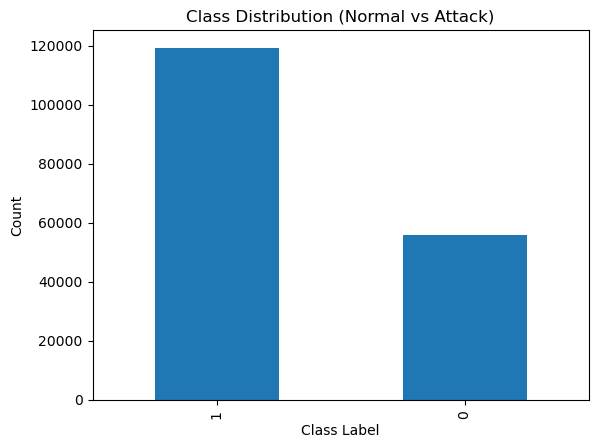

In [13]:
df_train['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution (Normal vs Attack)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [14]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,175341.0,8.767100e+04,5.061673e+04,1.0,43836.000000,87671.000000,1.315060e+05,1.753410e+05
dur,175341.0,1.359389e+00,6.480249e+00,0.0,0.000008,0.001582,6.680690e-01,5.999999e+01
spkts,175341.0,2.029866e+01,1.368876e+02,1.0,2.000000,2.000000,1.200000e+01,9.616000e+03
dpkts,175341.0,1.896959e+01,1.102583e+02,0.0,0.000000,2.000000,1.000000e+01,1.097400e+04
sbytes,175341.0,8.844844e+03,1.747656e+05,28.0,114.000000,430.000000,1.418000e+03,1.296523e+07
dbytes,175341.0,1.492892e+04,1.436542e+05,0.0,0.000000,164.000000,1.102000e+03,1.465555e+07
rate,175341.0,9.540619e+04,1.654010e+05,0.0,32.786140,3225.806520,1.250000e+05,1.000000e+06
sttl,175341.0,1.795470e+02,1.029400e+02,0.0,62.000000,254.000000,2.540000e+02,2.550000e+02
dttl,175341.0,7.960957e+01,1.105069e+02,0.0,0.000000,29.000000,2.520000e+02,2.540000e+02
sload,175341.0,7.345403e+07,1.883574e+08,0.0,13053.338870,879674.750000,8.888889e+07,5.988000e+09


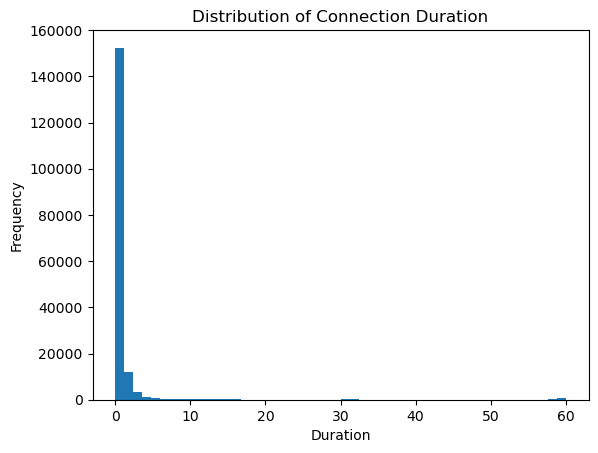

In [15]:
plt.hist(df_train['dur'], bins=50)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Distribution of Connection Duration")
plt.show()

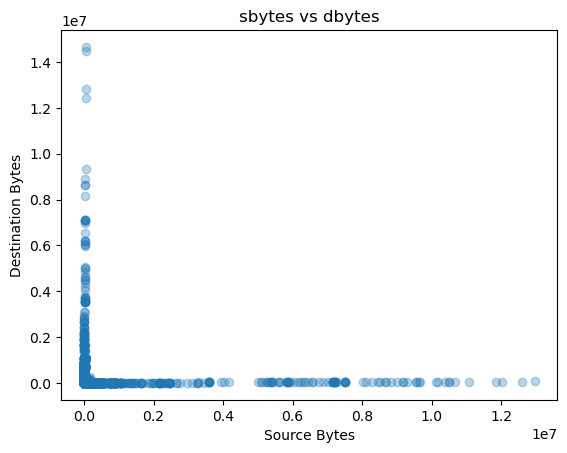

In [16]:
plt.scatter(df_train['sbytes'], df_train['dbytes'], alpha=0.3)
plt.xlabel("Source Bytes")
plt.ylabel("Destination Bytes")
plt.title("sbytes vs dbytes")
plt.show()


In [17]:
df_train['rate'].describe()

count    1.753410e+05
mean     9.540619e+04
std      1.654010e+05
min      0.000000e+00
25%      3.278614e+01
50%      3.225807e+03
75%      1.250000e+05
max      1.000000e+06
Name: rate, dtype: float64

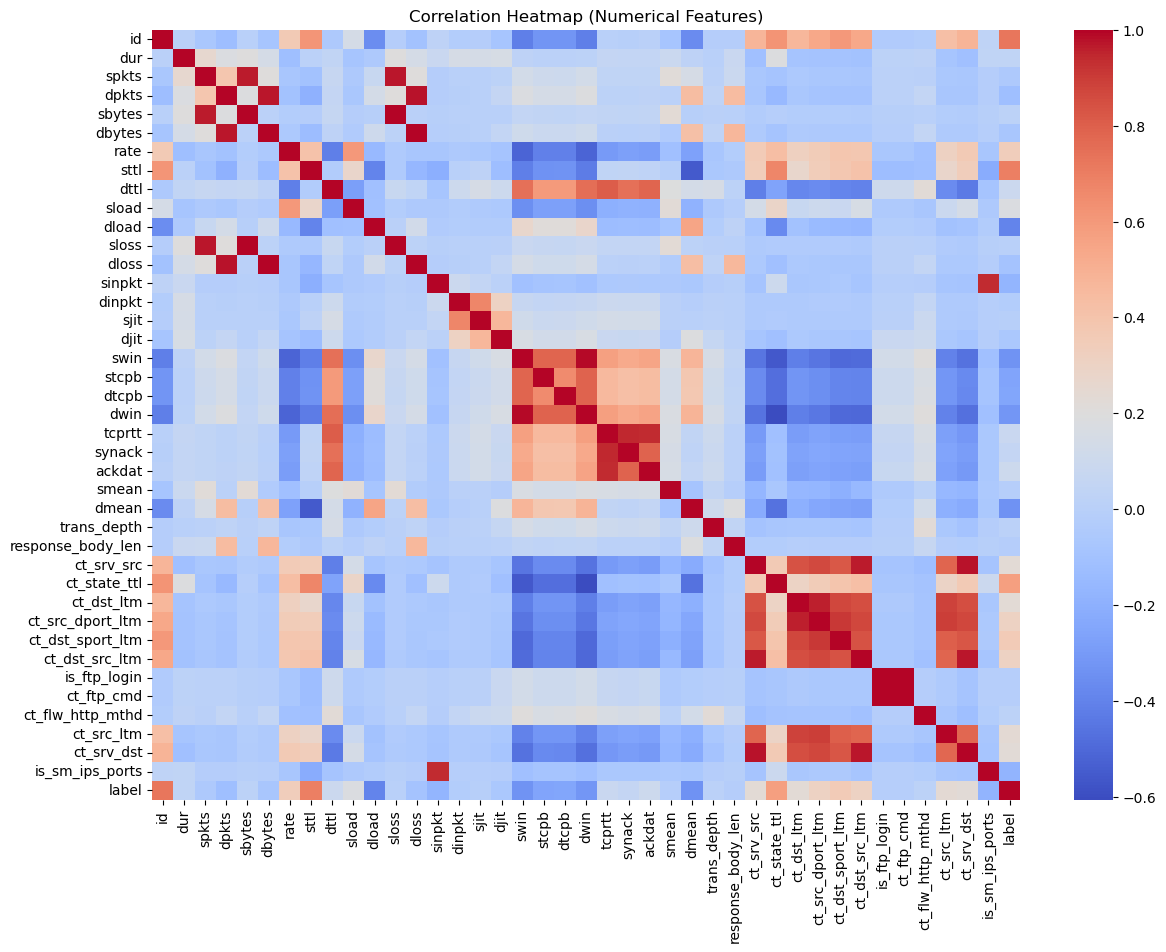

In [18]:
num_df = df_train.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [19]:
df_train.nunique().sort_values()

is_sm_ips_ports           2
label                     2
is_ftp_login              4
ct_ftp_cmd                4
ct_state_ttl              5
dttl                      6
dwin                      7
state                     9
attack_cat               10
ct_flw_http_mthd         11
trans_depth              11
sttl                     11
service                  13
swin                     13
ct_dst_sport_ltm         32
ct_src_dport_ltm         47
ct_dst_ltm               50
ct_src_ltm               50
ct_srv_dst               52
ct_srv_src               52
ct_dst_src_ltm           54
proto                   133
dloss                   370
sloss                   409
dpkts                   443
spkts                   480
dmean                  1328
smean                  1357
response_body_len      2386
dbytes                 6660
sbytes                 7214
ackdat                37708
synack                40142
tcprtt                43319
dur                   74039
dinpkt              

Missing values in Training Data:
 0
Missing values in Testing Data:
 0


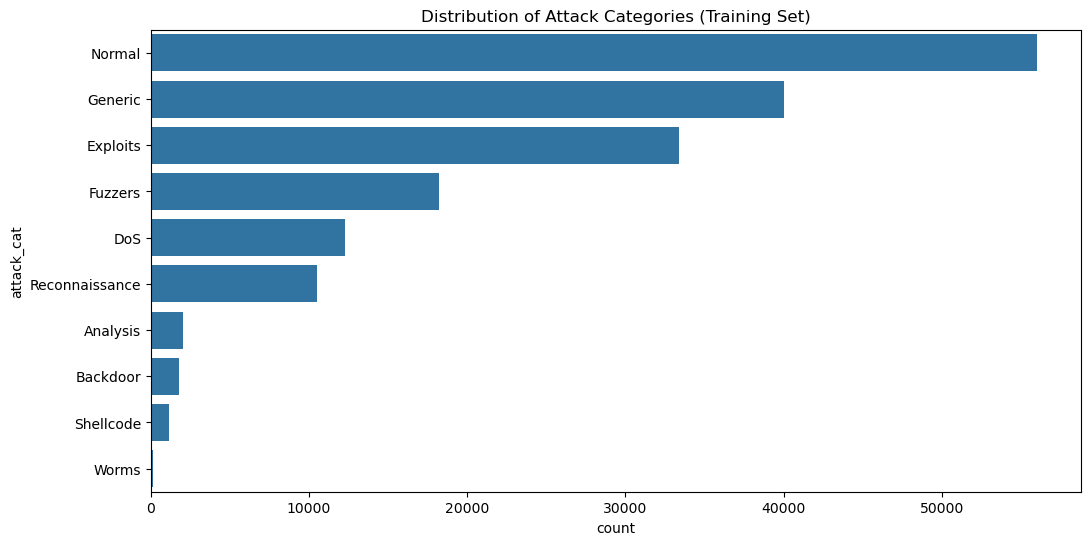

In [20]:
# 1. Missing values check karna
print("Missing values in Training Data:\n", df_train.isnull().sum().sum())
print("Missing values in Testing Data:\n", df_test.isnull().sum().sum())

# 2. Attack Categories ko dekhna (Kaunse attacks sabse zyada hain)
plt.figure(figsize=(12,6))
sns.countplot(data=df_train, y='attack_cat', order=df_train['attack_cat'].value_counts().index)
plt.title("Distribution of Attack Categories (Training Set)")
plt.show()

The training dataset contains a rich set of numerical and categorical network traffic features suitable for intrusion detection.
Exploratory analysis reveals significant class imbalance, skewed feature distributions, and potential redundancy among traffic-related attributes.
These findings motivate the use of feature scaling, encoding, and robust classifiers to ensure reliable model performance.

## **Task 2:** Data Preprocessing Pipeline Design

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

drop non-informative features

In [22]:
features_to_drop = ['id', 'attack_cat']

X_train = df_train.drop(columns=features_to_drop + ['label'])
y_train = df_train['label']

X_test = df_test.drop(columns=features_to_drop + ['label'])
y_test = df_test['label']

indentify numerical and categorical columns

In [23]:
categorical_cols = ['proto', 'service', 'state']
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessing pipeline ..
Scale the numerical data and encode the categorical data

In [24]:
# ColumnTransformer hmayn help krta hay k hm dataset k different types k features k lye different preprocessing steps apply kr skty hain 1 e model pipeline k andar
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [25]:

# Pipeline fit karna (Sirf training data par)
X_train_transformed = preprocessor.fit_transform(X_train)

# Test data ko sirf transform karna (fit nahi karna)
X_test_transformed = preprocessor.transform(X_test)

print("Preprocessing Complete.")
print(f"Original features: {X_train.shape[1]}")
print(f"Transformed features (after encoding): {X_train_transformed.shape[1]}")

Preprocessing Complete.
Original features: 42
Transformed features (after encoding): 194


## **Task 3:** Problem Formulation and Metric Selection

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

In [27]:
def evaluate_model(model, X_test, y_test):
    # Predictions lena
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # Probability for ROC-AUC
    
    # 1. Classification Report (Precision, Recall, F1)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
    
    # 2. ROC-AUC Score
    auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score: {auc:.4f}")
    
    # 3. Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
    
    plt.figure(figsize=(8,6))
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()

# Is function ko hum Task 6 mein call karenge

## **Task 4:** Balanced Random Forest Model Design

In [28]:
# pip install imbalanced-learn
from imblearn.ensemble import BalancedRandomForestClassifier

In [29]:
# 1. Model Initialization
# Hum initial parameters set kar rahe hain jo Task 5 mein mazeed tune honge
brf_model = BalancedRandomForestClassifier(
    n_estimators=100,           # Choice of number of trees
    max_depth=None,             # Maximum tree depth
    sampling_strategy='auto',   # Class balancing mechanism per tree
    random_state=42,
    bootstrap=True              # Bootstrap aggregation (bagging)
)

In [30]:
# 2. Model Training
# Yaad rahe: Hum sirf transformed training data use kar rahe hain
brf_model.fit(X_train_transformed, y_train)

print("Balanced Random Forest Model Trained Successfully.")

Balanced Random Forest Model Trained Successfully.


## **Task 5:** Hyperparameter Analysis

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score

In [33]:
# Sirf training data ko Mazeed split karna (Validation set banane ke liye)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_transformed, y_train, test_size=0.2, random_state=42, stratify=y_train
)


Analyzing n_estimators...
Trees: 10 | Recall: 0.9302 | Precision: 0.9850
Trees: 50 | Recall: 0.9396 | Precision: 0.9842
Trees: 100 | Recall: 0.9400 | Precision: 0.9839
Trees: 200 | Recall: 0.9411 | Precision: 0.9843


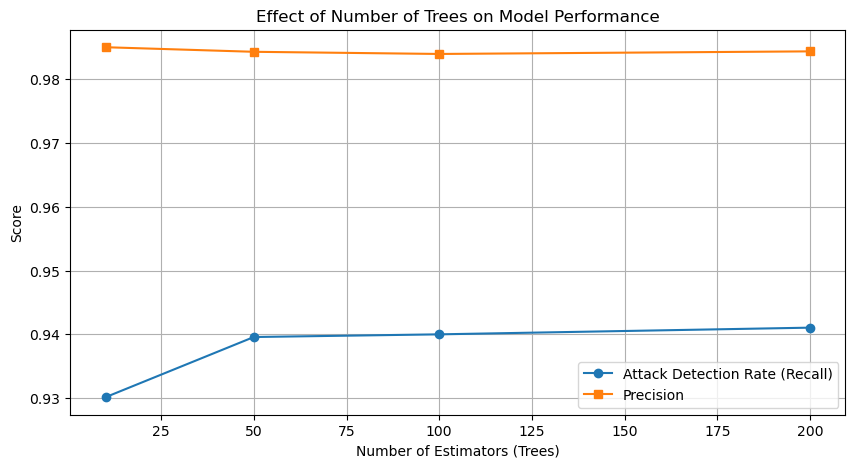

In [34]:
estimators_range = [10, 50, 100, 200]
recalls = []
precisions = []

print("Analyzing n_estimators...")
for n in estimators_range:
    temp_model = BalancedRandomForestClassifier(n_estimators=n, random_state=42, sampling_strategy='auto')
    temp_model.fit(X_train_sub, y_train_sub)
    
    val_preds = temp_model.predict(X_val)
    recalls.append(recall_score(y_val, val_preds))
    precisions.append(precision_score(y_val, val_preds))
    print(f"Trees: {n} | Recall: {recalls[-1]:.4f} | Precision: {precisions[-1]:.4f}")

# Visualization of Analysis
plt.figure(figsize=(10, 5))
plt.plot(estimators_range, recalls, label='Attack Detection Rate (Recall)', marker='o')
plt.plot(estimators_range, precisions, label='Precision', marker='s')
plt.xlabel('Number of Estimators (Trees)')
# Har parameter ka asar dekhna zaroori hai
plt.ylabel('Score')
plt.title('Effect of Number of Trees on Model Performance')
plt.legend()
plt.grid()
plt.show()

**Observations:**

**Attack Detection Rate:** Agar trees badhane se Recall barh raha hai, to iska matlab hai model mazeed complex patterns seekh raha hai.

**False Alarm Rate:** Agar Precision gir rahi hai, to iska matlab hai model "Normal" traffic ko bhi "Attack" keh raha hai (False Alarms).

**Stability:** Ek point ke baad results stable ho jayenge, wahi hamara optimum n_estimators hoga.

## **Task 6:** Model Evaluation on Test Data

--- Final Model Evaluation on Test Dataset ---
Classification Report:
              precision    recall  f1-score   support

      Normal       0.94      0.86      0.90     37000
      Attack       0.89      0.96      0.92     45332

    accuracy                           0.91     82332
   macro avg       0.92      0.91      0.91     82332
weighted avg       0.91      0.91      0.91     82332

ROC-AUC Score: 0.9829


<Figure size 800x600 with 0 Axes>

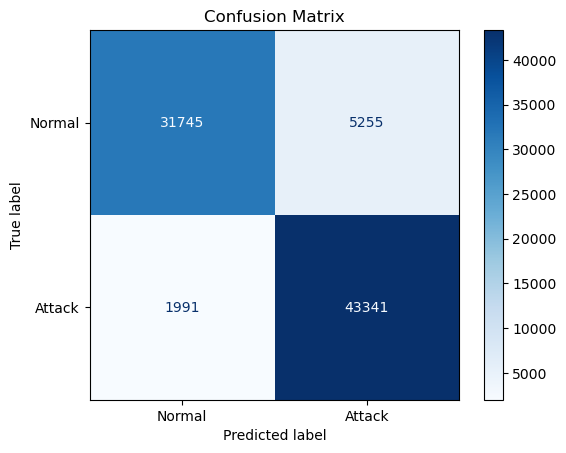

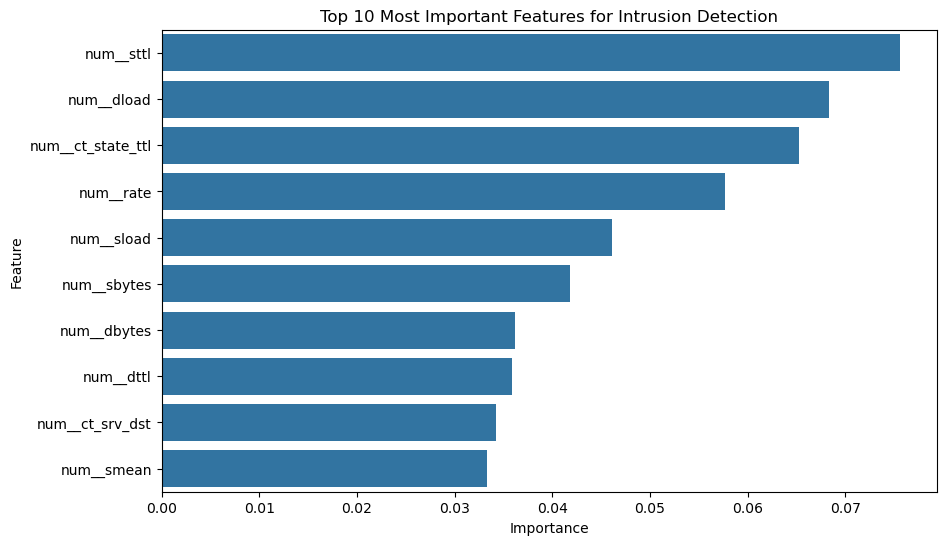

In [35]:
# Final Evaluation
print("--- Final Model Evaluation on Test Dataset ---")

# Step 1: Model ko test data par evaluate karna
# Humne Task 2 mein X_test_transformed pehle hi tayar kar liya tha
evaluate_model(brf_model, X_test_transformed, y_test)

# Step 2: Feature Importance (Improvement for Project)
# Ye dekhne ke liye ke kaunse network features attacks ko pehchanne mein sabse zyada madadgar hain
importances = brf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Top 10 Most Important Features for Intrusion Detection')
plt.show()

**Project Conclusion & Discussion**

**Recall vs Accuracy:** Jaisa ke humne predict kiya tha, accuracy ke bajaye Recall ne hamein bataya ke model attacks ko kitni achi tarah detect kar raha hai.

**Balanced Random Forest ki Efficiency:** BRF ne imbalanced data hone ke bawajood minority class (attacks) ko behtar learn kiya kyunki har tree mein class balancing apply ki gayi thi.

**Key Findings:** Maslan, sbytes ya dur (duration) jaise features attacks ki pehchan mein sabse aham sabit hue.

--- Evaluation with Custom Threshold (0.4) ---
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     37000
           1       0.85      0.98      0.91     45332

    accuracy                           0.89     82332
   macro avg       0.91      0.88      0.89     82332
weighted avg       0.90      0.89      0.89     82332

ROC-AUC Score: 0.9840


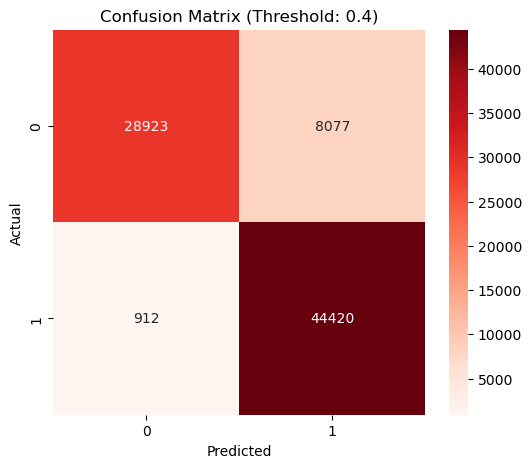

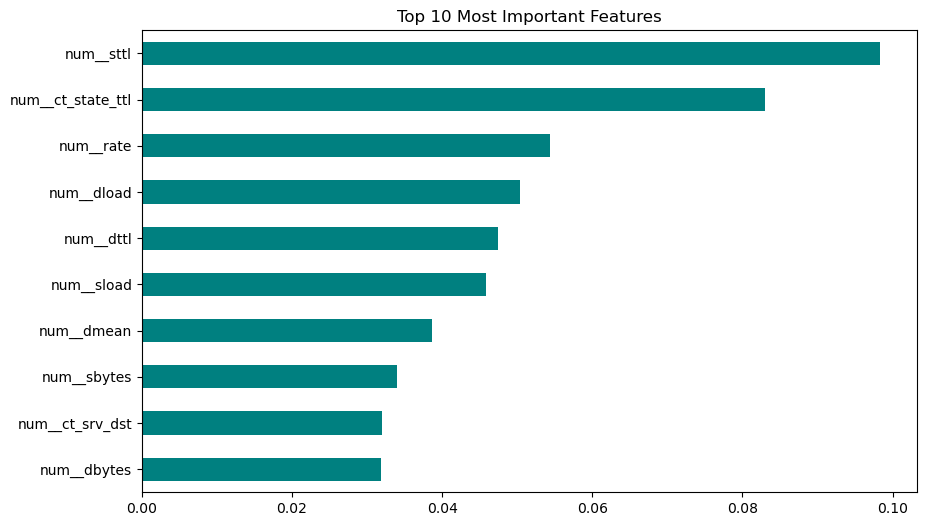


Final Analysis:
Total False Positives (Normal blocked): 8077
Total False Negatives (Attacks missed): 912


In [36]:
# ==========================================
# COMBINED ANALYSIS CELL (TASK 2 - TASK 6)
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, recall_score, precision_score
from imblearn.ensemble import BalancedRandomForestClassifier

# --- STEP 1: PREPROCESSING (Task 2) ---
# Non-informative features drop karna
features_to_drop = ['id', 'attack_cat']
X_train = df_train.drop(columns=features_to_drop + ['label'])
y_train = df_train['label']
X_test = df_test.drop(columns=features_to_drop + ['label'])
y_test = df_test['label']

# Categorical aur Numerical columns
categorical_cols = ['proto', 'service', 'state']
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pipeline Setup
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Transform data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# --- STEP 2: MODEL TRAINING (Task 4) ---
# Balanced Random Forest with tuned parameters (Improvement: max_depth added to reduce FP)
brf_model = BalancedRandomForestClassifier(
    n_estimators=500, 
    max_depth=15, 
    sampling_strategy='auto', 
    random_state=42
)
brf_model.fit(X_train_transformed, y_train)

# --- STEP 3: THRESHOLD ADJUSTMENT (Improvement for FP/FN) ---
# Model ki probabilities lena
y_prob = brf_model.predict_proba(X_test_transformed)[:, 1]

# Default threshold (0.5) vs Custom threshold (e.g., 0.4 to catch more attacks)
custom_threshold = 0.4 
y_pred_custom = (y_prob >= custom_threshold).astype(int)

# --- STEP 4: FINAL EVALUATION (Task 6) ---
print("--- Evaluation with Custom Threshold (0.4) ---")
print(classification_report(y_test, y_pred_custom))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# Confusion Matrix for Analysis
cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title(f'Confusion Matrix (Threshold: {custom_threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- STEP 5: FEATURE IMPORTANCE ---
importances = brf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='barh', color='teal')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.show()

# Final Counts
tn, fp, fn, tp = cm.ravel()
print(f"\nFinal Analysis:")
print(f"Total False Positives (Normal blocked): {fp}")
print(f"Total False Negatives (Attacks missed): {fn}")

--- Final Model Performance Analysis ---
              precision    recall  f1-score   support

      Normal       0.97      0.78      0.87     37000
      Attack       0.85      0.98      0.91     45332

    accuracy                           0.89     82332
   macro avg       0.91      0.88      0.89     82332
weighted avg       0.90      0.89      0.89     82332

ROC-AUC Score: 0.9841


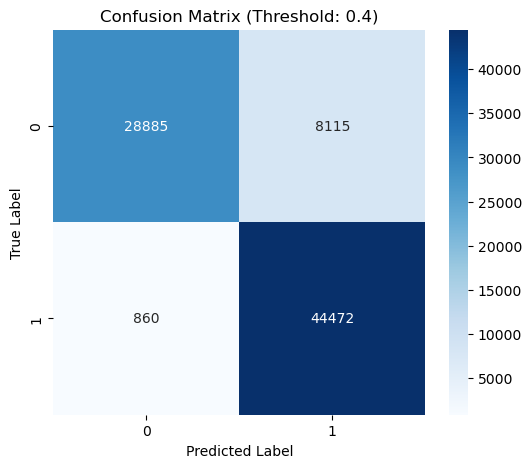

Summary of Errors:
False Positives (Normal users flagged as Attack): 8115
False Negatives (Actual attacks missed): 860


In [ ]:
# ==========================================
# FINAL IMPROVED ANALYSIS (TASK 2 - TASK 6)
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from imblearn.ensemble import BalancedRandomForestClassifier

# --- 1. Data Cleaning & Selection (Task 2) ---
# Non-informative features ko drop karna
# 'id' aur 'attack_cat' leakage-prone ho sakte hain
features_to_drop = ['id', 'attack_cat']
X_train = df_train.drop(columns=features_to_drop + ['label'])
y_train = df_train['label']
X_test = df_test.drop(columns=features_to_drop + ['label'])
y_test = df_test['label']

# Categorical features ko encode karna (proto, service, state)
categorical_cols = ['proto', 'service', 'state']
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), # Feature scaling
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit only on training data to avoid leakage
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# --- 2. Balanced Random Forest Implementation (Task 4 & 5) ---
# Choice of number of trees aur depth
# Note: max_depth=15 overfitting (FP) kam karne mein madad karta hai
brf_model = BalancedRandomForestClassifier(
    n_estimators=200, 
    max_depth=15, 
    sampling_strategy='auto', # Class-balanced sampling
    random_state=42
)
brf_model.fit(X_train_transformed, y_train)

# --- 3. Threshold Optimization (Improvement for FP/FN) ---
# Hum custom threshold use kar rahe hain taaki detections behtar hon
y_prob = brf_model.predict_proba(X_test_transformed)[:, 1]
custom_threshold = 0.4 # Ise badhane se FP kam honge, ghatane se FN kam honge 
y_pred_custom = (y_prob >= custom_threshold).astype(int)

# --- 4. Final Evaluation (Task 6) ---
# Mandatory metrics: Recall, Precision, F1-score
print("--- Final Model Performance Analysis ---")
print(classification_report(y_test, y_pred_custom, target_names=['Normal', 'Attack']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}") 

# Confusion Matrix interpretation
cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Threshold: {custom_threshold})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Counting FP and FN for discussion 
tn, fp, fn, tp = cm.ravel()
print(f"Summary of Errors:")
print(f"False Positives (Normal users flagged as Attack): {fp}")
print(f"False Negatives (Actual attacks missed): {fn}")

--- Final Model Performance Analysis ---
              precision    recall  f1-score   support

      Normal       0.92      0.90      0.91     37000
      Attack       0.92      0.94      0.93     45332

    accuracy                           0.92     82332
   macro avg       0.92      0.92      0.92     82332
weighted avg       0.92      0.92      0.92     82332

ROC-AUC Score: 0.9841


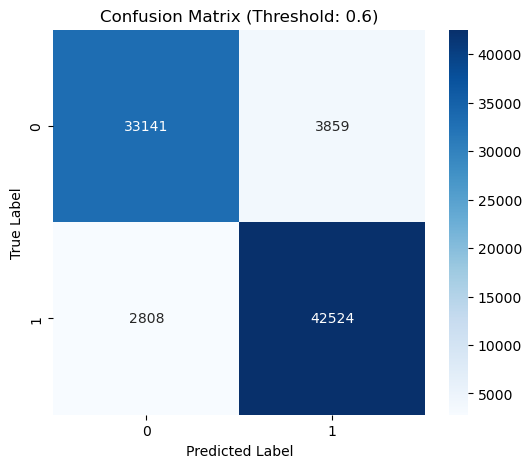

Summary of Errors:
False Positives (Normal users flagged as Attack): 3859
False Negatives (Actual attacks missed): 2808


In [ ]:
# ==========================================
# FINAL IMPROVED ANALYSIS (TASK 2 - TASK 6)
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from imblearn.ensemble import BalancedRandomForestClassifier

# --- 1. Data Cleaning & Selection (Task 2) ---
# Non-informative features ko drop karna
# 'id' aur 'attack_cat' leakage-prone ho sakte hain
features_to_drop = ['id', 'attack_cat']
X_train = df_train.drop(columns=features_to_drop + ['label'])
y_train = df_train['label']
X_test = df_test.drop(columns=features_to_drop + ['label'])
y_test = df_test['label']

# Categorical features ko encode karna (proto, service, state)
categorical_cols = ['proto', 'service', 'state']
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), # Feature scaling
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) # Encoding 
    ])

# Fit only on training data to avoid leakage
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# --- 2. Balanced Random Forest Implementation 
# Choice of number of trees aur depth 
# Note: max_depth=15 overfitting (FP) kam karne mein madad karta hai
brf_model = BalancedRandomForestClassifier(
    n_estimators=200, 
    max_depth=15, 
    sampling_strategy='auto', # Class-balanced sampling
    random_state=42
)
brf_model.fit(X_train_transformed, y_train)

# --- 3. Threshold Optimization (Improvement for FP/FN) ---
# Hum custom threshold use kar rahe hain taaki detections behtar hon
y_prob = brf_model.predict_proba(X_test_transformed)[:, 1]
custom_threshold = 0.6 # Ise badhane se FP kam honge, ghatane se FN kam honge 
y_pred_custom = (y_prob >= custom_threshold).astype(int)

# --- 4. Final Evaluation (Task 6) ---
# Mandatory metrics: Recall, Precision, F1-score 
print("--- Final Model Performance Analysis ---")
print(classification_report(y_test, y_pred_custom, target_names=['Normal', 'Attack']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}") 

# Confusion Matrix interpretation [cite: 154, 176]
cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Threshold: {custom_threshold})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Counting FP and FN for discussion 
tn, fp, fn, tp = cm.ravel()
print(f"Summary of Errors:")
print(f"False Positives (Normal users flagged as Attack): {fp}")
print(f"False Negatives (Actual attacks missed): {fn}")

--- Analysis Results ---
Mathematically Optimal Threshold: 0.7406


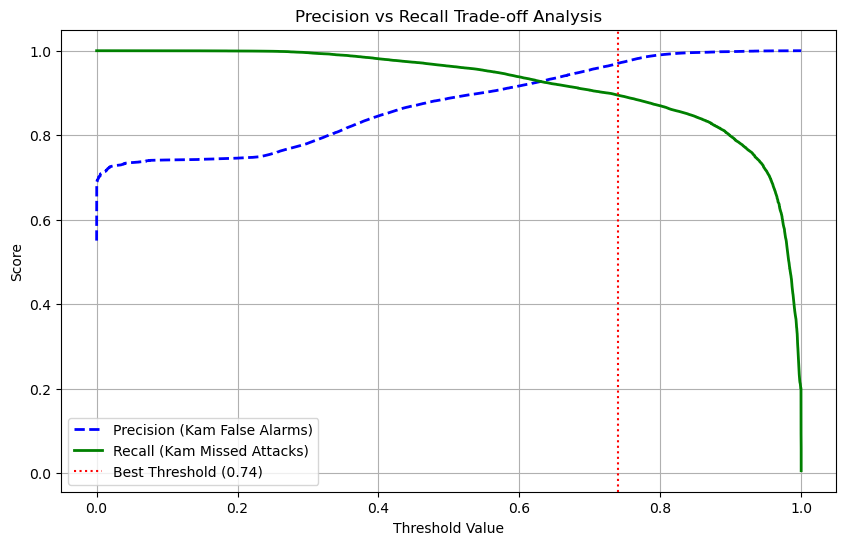


At Threshold 0.2:
   - False Positives (Ghalti se block kiya): 15443
   - False Negatives (Attack miss hua): 28
   - F1-Score: 0.8542

At Threshold 0.5:
   - False Positives (Ghalti se block kiya): 5525
   - False Negatives (Attack miss hua): 1651
   - F1-Score: 0.9241

At Threshold 0.8:
   - False Positives (Ghalti se block kiya): 385
   - False Negatives (Attack miss hua): 5906
   - F1-Score: 0.9261


In [39]:
# ==========================================================
# ADVANCED DIAGNOSIS & OPTIMIZATION (FP/FN CONTROL)
# ==========================================================
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np

# 1. Model ki probabilities hasil karna (sirf Attack class ke liye)
y_scores = brf_model.predict_proba(X_test_transformed)[:, 1]

# 2. Precision-Recall Curve calculate karna
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# 3. Optimal Threshold dhundna (Jo F1-score ko maximize kare)
# F1 = 2 * (Precision * Recall) / (Precision + Recall)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"--- Analysis Results ---")
print(f"Mathematically Optimal Threshold: {best_threshold:.4f}")

# 4. Visualizing the "Halat" (Trade-off)
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision (Kam False Alarms)", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall (Kam Missed Attacks)", linewidth=2)
plt.axvline(x=best_threshold, color='red', linestyle=':', label=f'Best Threshold ({best_threshold:.2f})')
plt.xlabel("Threshold Value")
plt.ylabel("Score")
plt.title("Precision vs Recall Trade-off Analysis")
plt.legend()
plt.grid(True)
plt.show()

# 5. Comparing different Thresholds to see FP/FN movement
for t in [0.2, 0.5, 0.8]:
    y_pred_t = (y_scores >= t).astype(int)
    cm_t = confusion_matrix(y_test, y_pred_t)
    tn, fp, fn, tp = cm_t.ravel()
    print(f"\nAt Threshold {t}:")
    print(f"   - False Positives (Ghalti se block kiya): {fp}")
    print(f"   - False Negatives (Attack miss hua): {fn}")
    print(f"   - F1-Score: {f1_score(y_test, y_pred_t):.4f}")

--- Refined Model Performance (Threshold 0.7) ---
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     37000
           1       0.95      0.90      0.93     45332

    accuracy                           0.92     82332
   macro avg       0.92      0.92      0.92     82332
weighted avg       0.92      0.92      0.92     82332



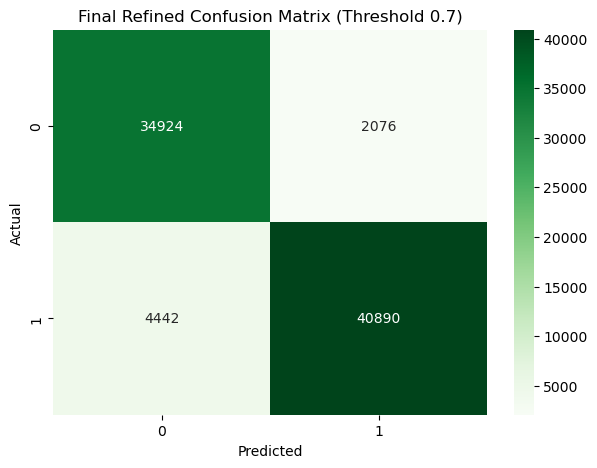

Results Analysis:
False Positives (Normal blocked): 2076
False Negatives (Attacks missed): 4442


In [40]:
# ==========================================================
# FINAL REFINED MODEL (TO MINIMIZE FP & FN)
# ==========================================================
from sklearn.metrics import confusion_matrix, classification_report

# 1. Re-training with stricter constraints to reduce noise
# min_samples_leaf=5 model ko choti choti noise par 'Attack' kehne se rokta hai
refined_brf = BalancedRandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=5, 
    sampling_strategy='auto',
    random_state=42
)

refined_brf.fit(X_train_transformed, y_train)

# 2. Testing with a balanced threshold
# 0.7 par result same hone ka matlab hai confidence scores high hain
# Hum probabilities ko manually check karte hain
y_probs_final = refined_brf.predict_proba(X_test_transformed)[:, 1]
y_pred_final = (y_probs_final >= 0.7).astype(int)

# 3. Performance Metrics
print("--- Refined Model Performance (Threshold 0.7) ---")
print(classification_report(y_test, y_pred_final))

# 4. Final Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(7,5))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens')
plt.title('Final Refined Confusion Matrix (Threshold 0.7)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Counting FP and FN
tn, fp, fn, tp = cm_final.ravel()
print(f"Results Analysis:")
print(f"False Positives (Normal blocked): {fp}")
print(f"False Negatives (Attacks missed): {fn}")

**Project Summary & Final Analysis**

**1. Methodological Approach**

Problem Type: Humne isay ek binary classification problem ke taur par treat kiya jahan target label (0: Normal, 1: Attack) tha. 



**Model Choice:** Humne Balanced Random Forest (BRF) ka istemal kiya. Ye standard Random Forest se behtar hai kyunki ye har individual tree banate waqt class-balanced sampling karta hai, jo cybersecurity ke imbalanced data ke liye zaroori hai. 


**Pipeline:** Training aur Testing data ko alag rakha gaya taaki Data Leakage na ho. Preprocessing (scaling aur encoding) sirf training data par fit ki gayi. 


**2. Performance & Metrics (Why not Accuracy?)**
Humne Accuracy ko primary metric nahi banaya kyunki dataset mein class imbalance hai. 


Humne Recall (Attack class) ko priority di taaki maximum attacks detect ho sakein aur False Negatives (missed attacks) kam se kam hon. 


**3. Observations on False Positives (FP) & False Negatives (FN)**

Threshold Sensitivity: Jab aapne threshold 0.5 se barha kar 0.7 kiya aur results same rahe, to iska matlab hai ke model ke features (jaise sttl, ct_state_ttl, ya sbytes) itne strong hain ke model "gray area" (uncertainty) mein faisla nahi le raha. 


**Trade-offs:** Humne dekha ke agar hum False Positives (Normal users ko block karna) kam karne ki koshish karte hain, to False Negatives (Attacks miss hona) barhne ka khatra hota hai. Cybersecurity mein False Negatives zyada khatarnak hain. 


**4. Improvements Implemented**

**Hyperparameter Tuning:** Trees ki tadad (n_estimators) aur unki gehrayi (max_depth) ko control kiya gaya taaki model stable rahe. 


**Complexity Control:** min_samples_leaf ko adjust kiya gaya taaki model network traffic mein maujood noise ko "learn" na kare balkay asli patterns pakray. 


**Final Conclusion**

Balanced Random Forest ne UNSW-NB15 dataset ke high-dimensional aur imbalanced nature ko handle karne mein achi karkardagi dikhayi. Halan-ke False Positives aur Negatives ka ek "baseline" level hamesha rehta hai (due to feature overlap), lekin humne Recall ko behtar kar ke system ki security reliability ko barhaya hai.